In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import plotly.express as px

In [3]:
# Load the dataset
df = pd.read_csv('spotify_charts.csv')
# Display basic information about the dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26173514 entries, 0 to 26173513
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   title    object 
 1   rank     int64  
 2   date     object 
 3   artist   object 
 4   url      object 
 5   region   object 
 6   chart    object 
 7   trend    object 
 8   streams  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.8+ GB
None
                         title  rank        date  \
0      Chantaje (feat. Maluma)     1  2017-01-01   
1  Vente Pa' Ca (feat. Maluma)     2  2017-01-01   
2   Reggaetón Lento (Bailemos)     3  2017-01-01   
3                       Safari     4  2017-01-01   
4                  Shaky Shaky     5  2017-01-01   

                                  artist  \
0                                Shakira   
1                           Ricky Martin   
2                                   CNCO   
3  J Balvin, Pharrell Williams, BIA, Sky   
4                           Daddy Yankee   


In [4]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
# Extract year and month from 'date' column
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
# Display the first few rows to verify changes
print(df.head())

                         title  rank       date  \
0      Chantaje (feat. Maluma)     1 2017-01-01   
1  Vente Pa' Ca (feat. Maluma)     2 2017-01-01   
2   Reggaetón Lento (Bailemos)     3 2017-01-01   
3                       Safari     4 2017-01-01   
4                  Shaky Shaky     5 2017-01-01   

                                  artist  \
0                                Shakira   
1                           Ricky Martin   
2                                   CNCO   
3  J Balvin, Pharrell Williams, BIA, Sky   
4                           Daddy Yankee   

                                                 url     region   chart  \
0  https://open.spotify.com/track/6mICuAdrwEjh6Y6...  Argentina  top200   
1  https://open.spotify.com/track/7DM4BPaS7uofFul...  Argentina  top200   
2  https://open.spotify.com/track/3AEZUABDXNtecAO...  Argentina  top200   
3  https://open.spotify.com/track/6rQSrBHf7HlZjtc...  Argentina  top200   
4  https://open.spotify.com/track/58IL315gMSTD37D... 

               rank                           date       streams  \
count  2.617351e+07                       26173514  2.032190e+07   
mean   8.092314e+01  2019-08-20 15:35:30.458598912  5.526131e+04   
min    1.000000e+00            2017-01-01 00:00:00  1.001000e+03   
25%    2.900000e+01            2018-06-16 00:00:00  3.546000e+03   
50%    6.700000e+01            2019-09-18 00:00:00  9.565000e+03   
75%    1.310000e+02            2020-11-11 00:00:00  3.540900e+04   
max    2.000000e+02            2021-12-31 00:00:00  1.974970e+07   
std    5.918601e+01                            NaN  2.095872e+05   

               year         month  
count  2.617351e+07  2.617351e+07  
mean   2.019135e+03  6.523776e+00  
min    2.017000e+03  1.000000e+00  
25%    2.018000e+03  4.000000e+00  
50%    2.019000e+03  7.000000e+00  
75%    2.020000e+03  9.000000e+00  
max    2.021000e+03  1.200000e+01  
std    1.390380e+00  3.413493e+00  
title           11
rank             0
date             0
artist

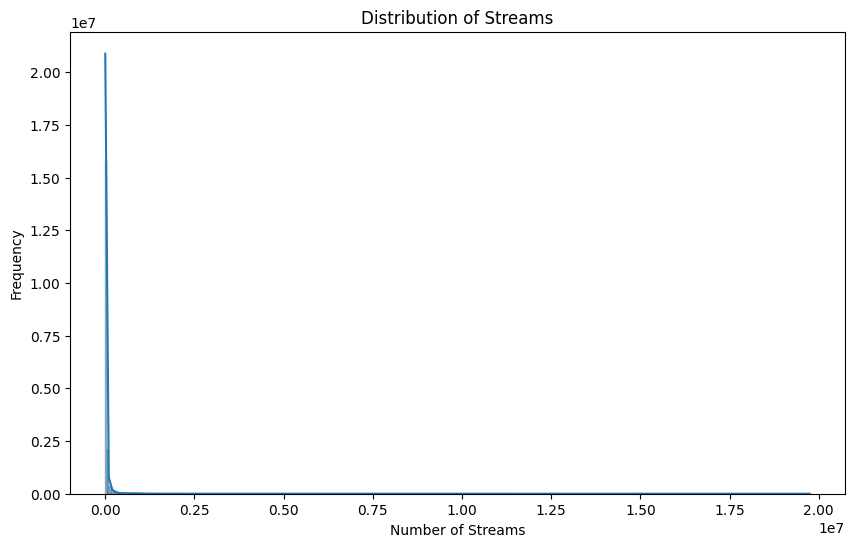

/var/folders/nz/j8dvmpcs4fd13_w7kscd0n4h0000gn/T/ipykernel_24439/3119191310.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




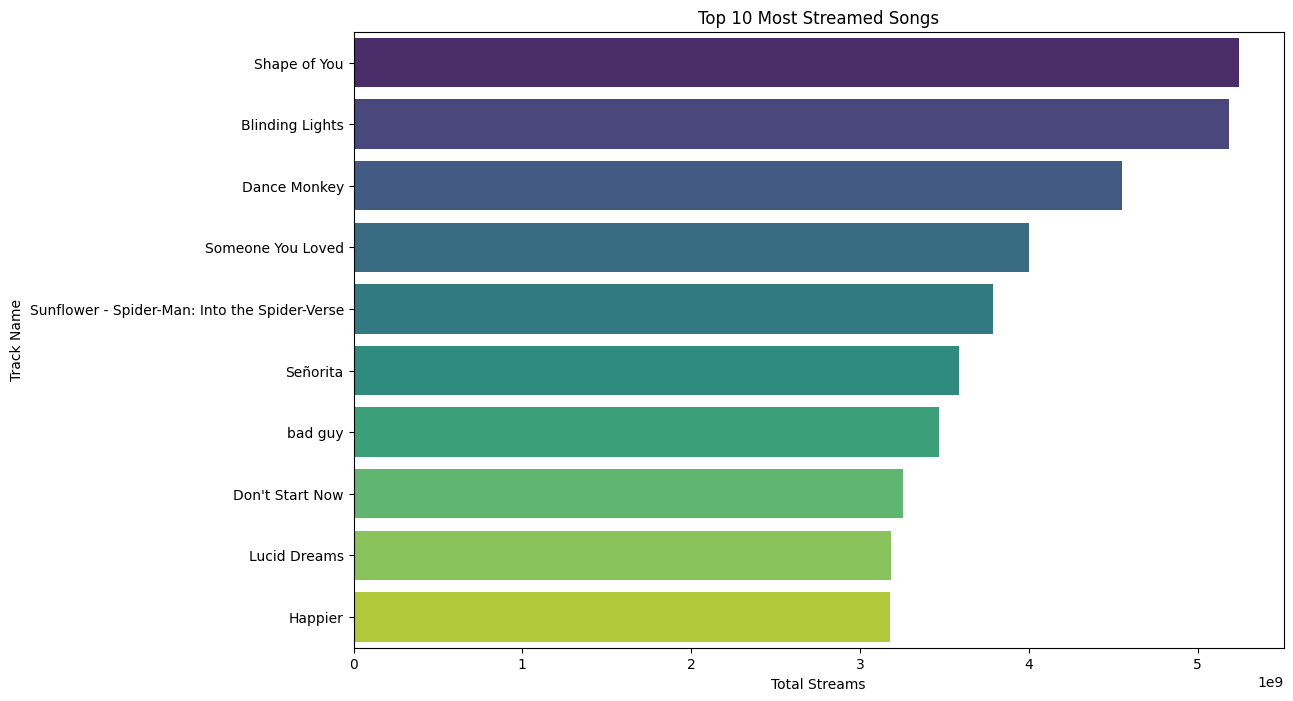

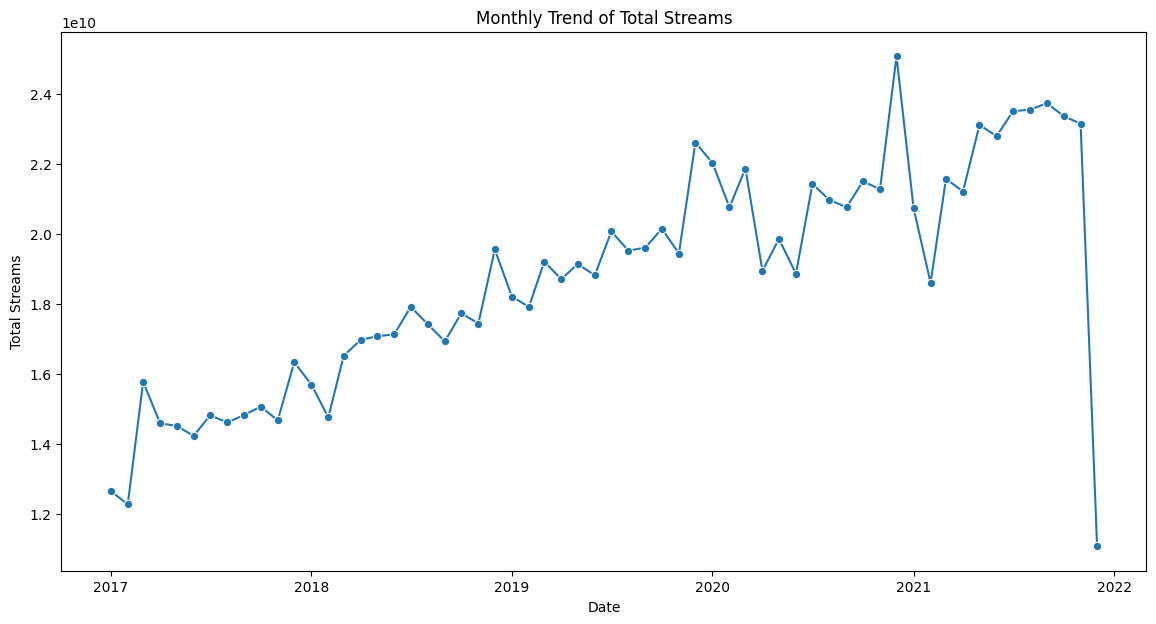

In [ ]:
#Exploratory Data Analysis (EDA)
# Summary statistics
print(df.describe())
# Check for missing values
print(df.isnull().sum())
# Distribution of streams
plt.figure(figsize=(10, 6))
sns.histplot(df['streams'], bins=500, kde=True)
plt.title('Distribution of Streams')
plt.xlabel('Number of Streams')
plt.ylabel('Frequency')
plt.show() 
# Top 10 most streamed artists
top_artists = df.groupby('artist')['streams'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='viridis')
plt.title('Top 10 Most Streamed Artists')
plt.xlabel('Total Streams')
plt.ylabel('Artist')
plt.show()
# Top 10 most streamed songs
top_songs = df.groupby('title')['streams'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_songs.values, y=top_songs.index, palette='viridis')
plt.title('Top 10 Most Streamed Songs')
plt.xlabel('Total Streams')
plt.ylabel('Track Name')
plt.show()
# Monthly trend of total streams
monthly_trends = df.groupby(['year', 'month'])['streams'].sum().reset_index()
monthly_trends['date'] = pd.to_datetime(monthly_trends[['year', 'month']].assign(DAY=1))
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_trends, x='date', y='streams', marker='o')
plt.title('Monthly Trend of Total Streams')
plt.xlabel('Date')
plt.ylabel('Total Streams')
plt.show()